In [1]:
import numpy as np
import pandas as pd
from importlib import reload
from pylab import plt
from sklearn.preprocessing import PowerTransformer

import utils; reload(utils)

<module 'utils' from '/Users/kizawamasakazu/projects/machine_learning/work/time_series/stock_price_prediction/n225/utils.py'>

前処理
- zscore化

array([[<AxesSubplot: title={'center': 'Close'}>,
        <AxesSubplot: title={'center': 'High'}>],
       [<AxesSubplot: title={'center': 'Low'}>,
        <AxesSubplot: title={'center': 'Open'}>],
       [<AxesSubplot: title={'center': 'Volume'}>, <AxesSubplot: >]],
      dtype=object)

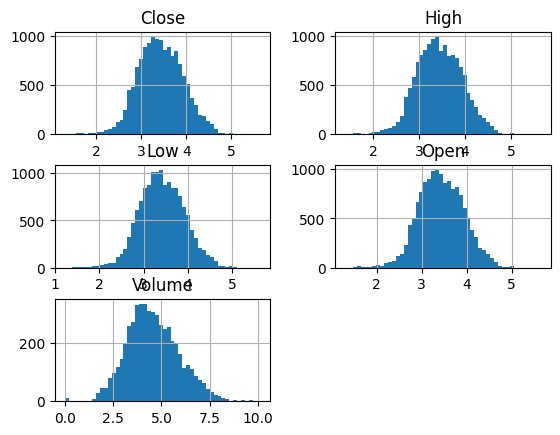

In [2]:
df = pd.read_csv('N225.csv')
df['log_return'] = np.log(df['Close']).diff()
df['y'] = df['log_return'].shift(-1)
# df['y'] = df['Adj Close'].shift(-1)
columns = ['Close', 'High', 'Low', 'Open', 'Volume']
for column in columns:
    df[f'{column}_std'] = df[column].ewm(halflife=15).std()
    df[f'{column}_mean'] = df[column].ewm(halflife=15).mean()
    df[column] = df[column] / df[f'{column}_std']
    if column != "Volume":
        df[column] = np.log(df[column])
        # df[column] = df[column] - df[column].ewm(halflife=15)

df[columns].hist(bins=50)

In [ ]:
# 特徴量を作成する
